### ### Importing all nessesary libraries

In [129]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##### EDA & visualizations 

In [2]:
#importing our data
data=pd.read_csv('airbnb.csv')

In [3]:
#checking data head and tail 
data.head()

,Listings id,Last year reviews,Host since,Host is superhost,Host number of listings,Neighbourhood,Beds number,Bedrooms number,Property type,Maximum allowed guests,...,Communication score,Location score,Value for money score,Reviews per month,City,Season,Bathrooms number,Bathrooms type,Coordinates,Date of scraping
0,31840,6,2011-02-07,Host,44.0,Centro Storico,1.0,1.0,Private room,2,...,4.91,4.91,4.70,0.78,Firenze,Early Winter,1,private,"43.77709, 11.25216",2024-12-15
1,222527,0,2011-07-11,Superhost,3.0,Rifredi,3.0,2.0,Entire home,4,...,4.96,4.60,4.86,1.92,Firenze,Early Winter,1,private,"43.82005, 11.22004",2024-12-15
2,32120,6,2010-03-26,Host,1.0,Gavinana Galluzzo,1.0,1.0,Entire home,2,...,4.96,4.63,4.63,0.16,Firenze,Early Winter,1,private,"43.76157, 11.27741",2024-12-15
3,224562,9,2011-09-16,Host,2.0,Centro Storico,1.0,1.0,Entire home,4,...,4.83,4.93,4.64,0.71,Firenze,Early Winter,1,private,"43.772, 11.26142",2024-12-15
4,32180,11,2014-04-05,Superhost,1.0,Centro Storico,4.0,2.0,Entire home,4,...,4.71,4.81,4.84,0.21,Firenze,Early Winter,2,private,"43.76832, 11.24348",2024-12-15


In [4]:
data.tail()

,Listings id,Last year reviews,Host since,Host is superhost,Host number of listings,Neighbourhood,Beds number,Bedrooms number,Property type,Maximum allowed guests,...,Communication score,Location score,Value for money score,Reviews per month,City,Season,Bathrooms number,Bathrooms type,Coordinates,Date of scraping
282042,1225415779557432758,1,2023-07-09,Host,3.0,Santa Croce,3.0,2.0,Entire home,4,...,2.0,5.0,1.0,1.0,Venezia,Early Autumn,1,private,"45.44175, 12.32484",2024-09-15
282043,1226565187491241376,1,2016-09-09,Host,1.0,Dorsoduro,1.0,1.0,Entire home,2,...,5.0,5.0,5.0,1.0,Venezia,Early Autumn,1,private,"45.43524874231471, 12.3209960013628",2024-09-15
282044,1227320704279156110,1,2022-03-06,Host,6.0,Piave 1860,3.0,3.0,Entire home,5,...,1.0,3.0,2.0,1.0,Venezia,Early Autumn,1,private,"45.4859248, 12.2292505",2024-09-15
282045,1227366399659654882,1,2024-04-26,Host,14.0,San Lorenzo XXV Aprile,2.0,1.0,Entire home,4,...,5.0,5.0,5.0,1.0,Venezia,Early Autumn,1,private,"45.49259973446829, 12.244685252349434",2024-09-15
282046,1228931183480447079,1,2014-07-05,Host,11.0,Cannaregio,1.0,1.0,Entire home,2,...,5.0,5.0,4.0,1.0,Venezia,Early Autumn,1,private,"45.43932359710468, 12.338529692358108",2024-09-15


In [5]:
#checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282047 entries, 0 to 282046
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Listings id              282047 non-null  int64  
 1   Last year reviews        282047 non-null  int64  
 2   Host since               282047 non-null  object 
 3   Host is superhost        282047 non-null  object 
 4   Host number of listings  282047 non-null  float64
 5   Neighbourhood            282047 non-null  object 
 6   Beds number              282047 non-null  float64
 7   Bedrooms number          282047 non-null  float64
 8   Property type            282047 non-null  object 
 9   Maximum allowed guests   282047 non-null  int64  
 10  Price                    282047 non-null  float64
 11  Total reviews            282047 non-null  int64  
 12  Rating score             282047 non-null  float64
 13  Accuracy score           282047 non-null  float64
 14  Clea

In [6]:
#unique elements of dataset 
data.nunique()

Listings id                92355
Last year reviews            228
Host since                  5074
Host is superhost              2
Host number of listings      393
Neighbourhood                195
Beds number                   11
Bedrooms number               11
Property type                  4
Maximum allowed guests        16
Price                       1682
Total reviews                929
Rating score                 210
Accuracy score               198
Cleanliness score            216
Checkin score                192
Communication score          194
Location score               204
Value for money score        220
Reviews per month           1356
City                           5
Season                         4
Bathrooms number              11
Bathrooms type                 2
Coordinates                90081
Date of scraping               4
dtype: int64

In [7]:
data.describe()

,Listings id,Last year reviews,Host number of listings,Beds number,Bedrooms number,Maximum allowed guests,Price,Total reviews,Rating score,Accuracy score,Cleanliness score,Checkin score,Communication score,Location score,Value for money score,Reviews per month,Bathrooms number
count,2.820470e+05,282047.000000,282047.000000,282047.000000,282047.000000,282047.000000,282047.000000,282047.000000,282047.000000,282047.000000,282047.000000,282047.000000,282047.000000,282047.000000,282047.000000,282047.000000,282047.000000
mean,4.131513e+17,17.187639,31.222101,2.050325,1.381422,3.604658,173.157004,61.116112,4.721083,4.769382,4.744537,4.809686,4.823221,4.743698,4.635770,1.709110,1.268292
std,4.559440e+17,22.029768,113.235177,1.300188,0.730077,1.804754,736.260971,97.325177,0.386492,0.361869,0.380168,0.338005,0.341393,0.339830,0.416751,1.810309,0.592222
min,2.737000e+03,0.000000,1.000000,0.000000,0.000000,1.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,2.349391e+07,2.000000,1.000000,1.000000,1.000000,2.000000,85.000000,6.000000,4.630000,4.710000,4.670000,4.770000,4.800000,4.650000,4.530000,0.370000,1.000000
50%,5.202756e+07,8.000000,3.000000,2.000000,1.000000,4.000000,120.000000,22.000000,4.830000,4.870000,4.860000,4.910000,4.930000,4.850000,4.740000,1.090000,1.000000
75%,8.760335e+17,26.000000,10.000000,3.000000,2.000000,4.000000,174.000000,72.000000,4.960000,4.980000,4.990000,5.000000,5.000000,4.970000,4.880000,2.500000,1.000000
max,1.243448e+18,926.000000,7243.000000,10.000000,10.000000,16.000000,95195.000000,2479.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,64.550000,10.000000


In [8]:
#missing values 
data.isnull().sum()

Listings id                0
Last year reviews          0
Host since                 0
Host is superhost          0
Host number of listings    0
Neighbourhood              0
Beds number                0
Bedrooms number            0
Property type              0
Maximum allowed guests     0
Price                      0
Total reviews              0
Rating score               0
Accuracy score             0
Cleanliness score          0
Checkin score              0
Communication score        0
Location score             0
Value for money score      0
Reviews per month          0
City                       0
Season                     0
Bathrooms number           0
Bathrooms type             0
Coordinates                0
Date of scraping           0
dtype: int64

#### From previous column result we can see there are no any null value in entire dataset
#### So we can move Explore Data characheristics 

In [9]:
#how many different types we have in Property type ?
data['Property type'].value_counts()

Property type
Entire home     223348
Private room     54621
Hotel room        2764
Shared room       1314
Name: count, dtype: int64

In [10]:
#How many different locations we have ?
data['City'].value_counts()

City
Roma       104981
Milano      75889
Firenze     41243
Napoli      31287
Venezia     28647
Name: count, dtype: int64

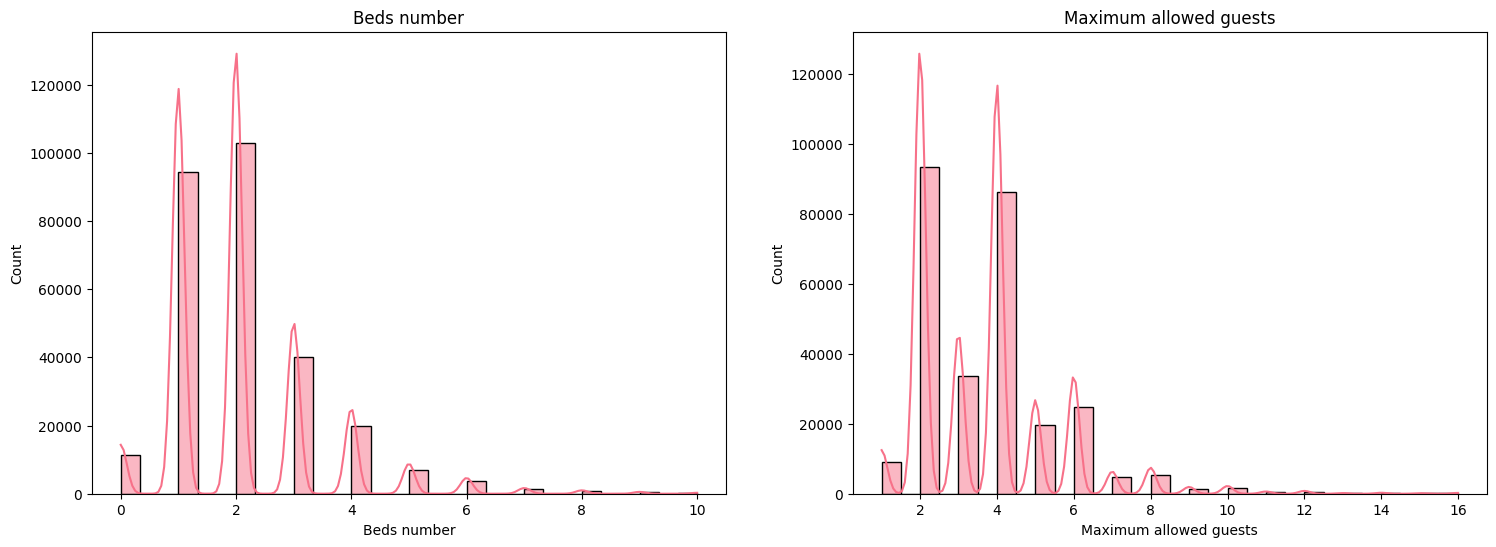

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(data['Beds number'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Beds number')

sns.histplot(data['Maximum allowed guests'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Maximum allowed guests')
plt.show()

<Axes: xlabel='Property type', ylabel='Maximum allowed guests'>

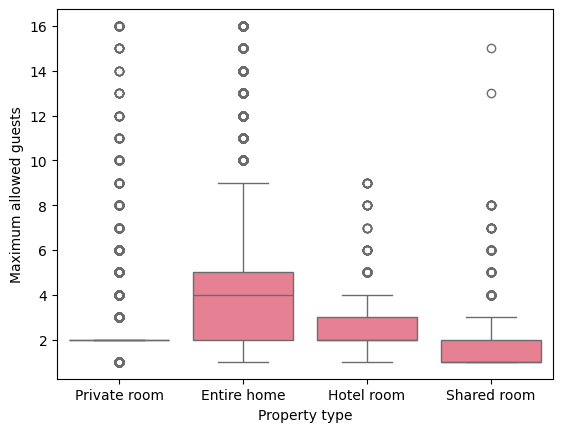

In [36]:
sns.boxplot(x=data['Property type'],y=data['Maximum allowed guests'])

#### Property rating prediction

In [37]:
data.head()

,Listings id,Last year reviews,Host since,Host is superhost,Host number of listings,Neighbourhood,Beds number,Bedrooms number,Property type,Maximum allowed guests,...,Communication score,Location score,Value for money score,Reviews per month,City,Season,Bathrooms number,Bathrooms type,Coordinates,Date of scraping
0,31840,6,2011-02-07,Host,44.0,Centro Storico,1.0,1.0,Private room,2,...,4.91,4.91,4.70,0.78,Firenze,Early Winter,1,private,"43.77709, 11.25216",2024-12-15
1,222527,0,2011-07-11,Superhost,3.0,Rifredi,3.0,2.0,Entire home,4,...,4.96,4.60,4.86,1.92,Firenze,Early Winter,1,private,"43.82005, 11.22004",2024-12-15
2,32120,6,2010-03-26,Host,1.0,Gavinana Galluzzo,1.0,1.0,Entire home,2,...,4.96,4.63,4.63,0.16,Firenze,Early Winter,1,private,"43.76157, 11.27741",2024-12-15
3,224562,9,2011-09-16,Host,2.0,Centro Storico,1.0,1.0,Entire home,4,...,4.83,4.93,4.64,0.71,Firenze,Early Winter,1,private,"43.772, 11.26142",2024-12-15
4,32180,11,2014-04-05,Superhost,1.0,Centro Storico,4.0,2.0,Entire home,4,...,4.71,4.81,4.84,0.21,Firenze,Early Winter,2,private,"43.76832, 11.24348",2024-12-15


In [146]:
# find how many days that our host is available 
data['Host since']=pd.to_datetime(data['Host since'])
data['Date of scraping'] = pd.to_datetime(data['Date of scraping'])
data['Days_difference'] = (data['Date of scraping'] - data['Host since']).dt.days

In [167]:
y=data['Price']
X=data.drop('Price',axis=1)

AttributeError: 'DataFrame' object has no attribute 'corr_'

In [168]:
X=X.drop(['Listings id','Host since','Date of scraping','Date_of_scraping','Coordinates'],axis=1)

In [169]:
X.head()

,Last year reviews,Host is superhost,Host number of listings,Neighbourhood,Beds number,Bedrooms number,Property type,Maximum allowed guests,Total reviews,Rating score,...,Checkin score,Communication score,Location score,Value for money score,Reviews per month,City,Season,Bathrooms number,Bathrooms type,Days_difference
0,6,Host,44.0,Centro Storico,1.0,1.0,Private room,2,128,4.65,...,4.85,4.91,4.91,4.70,0.78,Firenze,Early Winter,1,private,5060
1,0,Superhost,3.0,Rifredi,3.0,2.0,Entire home,4,284,4.85,...,4.99,4.96,4.60,4.86,1.92,Firenze,Early Winter,1,private,4906
2,6,Host,1.0,Gavinana Galluzzo,1.0,1.0,Entire home,2,26,4.88,...,4.84,4.96,4.63,4.63,0.16,Firenze,Early Winter,1,private,5378
3,9,Host,2.0,Centro Storico,1.0,1.0,Entire home,4,101,4.66,...,4.76,4.83,4.93,4.64,0.71,Firenze,Early Winter,1,private,4839
4,11,Superhost,1.0,Centro Storico,4.0,2.0,Entire home,4,34,4.76,...,4.81,4.71,4.81,4.84,0.21,Firenze,Early Winter,2,private,3907


In [170]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282047 entries, 0 to 282046
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Last year reviews        282047 non-null  int64  
 1   Host is superhost        282047 non-null  object 
 2   Host number of listings  282047 non-null  float64
 3   Neighbourhood            282047 non-null  object 
 4   Beds number              282047 non-null  float64
 5   Bedrooms number          282047 non-null  float64
 6   Property type            282047 non-null  object 
 7   Maximum allowed guests   282047 non-null  int64  
 8   Total reviews            282047 non-null  int64  
 9   Rating score             282047 non-null  float64
 10  Accuracy score           282047 non-null  float64
 11  Cleanliness score        282047 non-null  float64
 12  Checkin score            282047 non-null  float64
 13  Communication score      282047 non-null  float64
 14  Loca

Preprocessing of our data

In [171]:
X['Neighbourhood'].value_counts()
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [172]:
lb=LabelEncoder()
X['Neighbourhood']=lb.fit_transform(X['Neighbourhood'])

In [173]:
X['Host is superhost'].value_counts()
on=OneHotEncoder(sparse_output=False)
X['Host is superhost']=on.fit_transform(X[['Host is superhost']])


In [174]:
X['Property type'].value_counts()
X['Property type']=lb.fit_transform(X['Property type'])

In [175]:
X['Season'].value_counts()

X['Season']=lb.fit_transform(X['Season'])

In [176]:
X['City'].value_counts()
X['City']=lb.fit_transform(X['City'])

In [177]:
X['Bathrooms type'].value_counts()
X['Bathrooms type']=on.fit_transform(X[['Bathrooms type']])

In [178]:
X.head()

,Last year reviews,Host is superhost,Host number of listings,Neighbourhood,Beds number,Bedrooms number,Property type,Maximum allowed guests,Total reviews,Rating score,...,Checkin score,Communication score,Location score,Value for money score,Reviews per month,City,Season,Bathrooms number,Bathrooms type,Days_difference
0,6,1.0,44.0,39,1.0,1.0,2,2,128,4.65,...,4.85,4.91,4.91,4.70,0.78,0,3,1,1.0,5060
1,0,0.0,3.0,132,3.0,2.0,0,4,284,4.85,...,4.99,4.96,4.60,4.86,1.92,0,3,1,1.0,4906
2,6,1.0,1.0,63,1.0,1.0,0,2,26,4.88,...,4.84,4.96,4.63,4.63,0.16,0,3,1,1.0,5378
3,9,1.0,2.0,39,1.0,1.0,0,4,101,4.66,...,4.76,4.83,4.93,4.64,0.71,0,3,1,1.0,4839
4,11,0.0,1.0,39,4.0,2.0,0,4,34,4.76,...,4.81,4.71,4.81,4.84,0.21,0,3,2,1.0,3907


In [179]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282047 entries, 0 to 282046
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Last year reviews        282047 non-null  int64  
 1   Host is superhost        282047 non-null  float64
 2   Host number of listings  282047 non-null  float64
 3   Neighbourhood            282047 non-null  int32  
 4   Beds number              282047 non-null  float64
 5   Bedrooms number          282047 non-null  float64
 6   Property type            282047 non-null  int32  
 7   Maximum allowed guests   282047 non-null  int64  
 8   Total reviews            282047 non-null  int64  
 9   Rating score             282047 non-null  float64
 10  Accuracy score           282047 non-null  float64
 11  Cleanliness score        282047 non-null  float64
 12  Checkin score            282047 non-null  float64
 13  Communication score      282047 non-null  float64
 14  Loca

In [180]:
from sklearn.linear_model import LogisticRegression

X=X.copy()
X_array=X.to_numpy()
if len(y.shape) > 1:
    y = y.ravel()
print(y)

0          89.0
1         300.0
2          95.0
3          60.0
4         105.0
          ...  
282042    120.0
282043    173.0
282044    125.0
282045    132.0
282046    211.0
Name: Price, Length: 282047, dtype: float64


In [225]:
sc=StandardScaler()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [226]:
X_train.shape

(225637, 22)

In [227]:
X_test.shape

(56410, 22)

In [228]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [229]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
corr_features=correlation(X_train,0.85)
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

<Axes: >

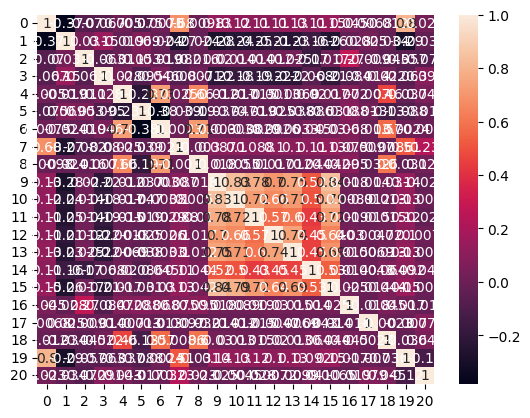

In [230]:
correlation_matrix = np.corrcoef(X_train, rowvar=False)
sns.heatmap(correlation_matrix,annot=True)

In [231]:
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
lg.fit(X_train,y_train)

LinearRegression()

In [232]:
y_pred=lg.predict(X_test)

In [184]:
y_pred

array([161.50149836, 142.31853263, 169.47313774, ..., 279.28797012,
         9.72498319, 177.81895501])

In [217]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mean=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae,mean,r2)

88.40483918009012 528502.0770696469 0.012093581332580983


In [233]:
from sklearn.linear_model import ElasticNet
el=ElasticNet()
el.fit(X_train,y_train)
y_pred=el.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
mean=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae,mean,r2)

88.52356395836757 528778.4710449178 0.01157692984889136


In [234]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282047 entries, 0 to 282046
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Last year reviews        282047 non-null  int64  
 1   Host is superhost        282047 non-null  float64
 2   Host number of listings  282047 non-null  float64
 3   Neighbourhood            282047 non-null  int32  
 4   Beds number              282047 non-null  float64
 5   Bedrooms number          282047 non-null  float64
 6   Property type            282047 non-null  int32  
 7   Maximum allowed guests   282047 non-null  int64  
 8   Total reviews            282047 non-null  int64  
 9   Rating score             282047 non-null  float64
 10  Accuracy score           282047 non-null  float64
 11  Cleanliness score        282047 non-null  float64
 12  Checkin score            282047 non-null  float64
 13  Communication score      282047 non-null  float64
 14  Loca

In [235]:
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredLogarithmicError
model1=tf.keras.models.Sequential([
    tf.keras.layers.Dense(60,activation='relu'),
    tf.keras.layers.Dense(30,activation='relu'),
    tf.keras.layers.Dense(15,activation='relu'),
    tf.keras.layers.Dense(1,activation='linear'),
    
])
msle = MeanSquaredLogarithmicError()
model1.compile(
    loss=msle, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    metrics=[msle]
)
# train the model
history = model1.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
2821/2821 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.5222 - mean_squared_logarithmic_error: 2.5222 - val_loss: 0.2577 - val_mean_squared_logarithmic_error: 0.2575
Epoch 2/10
2821/2821 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2465 - mean_squared_logarithmic_error: 0.2465 - val_loss: 0.2465 - val_mean_squared_logarithmic_error: 0.2463
Epoch 3/10
2821/2821 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2382 - mean_squared_logarithmic_error: 0.2382 - val_loss: 0.2411 - val_mean_squared_logarithmic_error: 0.2409
Epoch 4/10
2821/2821 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2324 - mean_squared_logarithmic_error: 0.2324 - val_loss: 0.2355 - val_mean_squared_logarithmic_error: 0.2353
Epoch 5/10
2821/2821 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.2287 - mean_squared_logarithmic_error: 0.2287 - val_loss: 0.2325 - val_mean_squared_logarithmic_error: 0.2323
Epoch 6/10
2821/2821 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - loss: 0.2235 - mean_squared_logarithmic_error: 0.2235 - val_loss: 0.2324

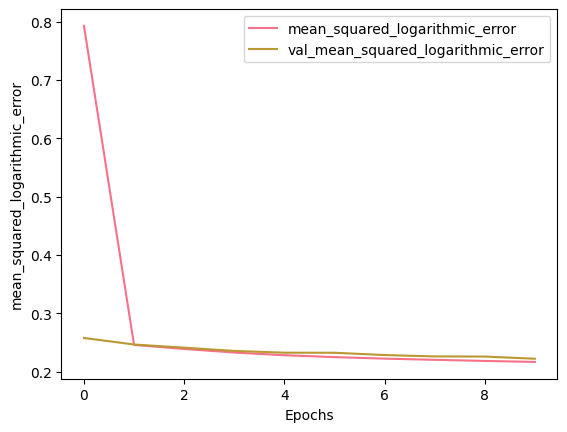

In [236]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [237]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train,y_train)
y_pred=elasticcv.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 88.40559764440921
R2 Score 0.01209316649420289
